<h1><span style="text-align: center;">Pandas Lesson, Session - 6</span><h1>

**Missing value handling methods**

 1. <b>Deleting Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


gender=["M","F","M","F","M","F","M","F","M","F","M"]
clas = ["a","b",np.nan,"a","b","c","a",np.nan,"c",np.nan,"b"]
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14,np.nan,6])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3,7,9])
V3 = np.array([np.NaN,130,59,160,120,75,np.NaN,100,150,125,np.nan])
dept = ["HR","IT","IT","HR","IT",np.nan,"HR","IT",np.nan,"HR","IT"]

df = pd.DataFrame({
         "gender": gender,
          "class": clas,
          "var1" : V1,
          "var2" : V2,
         "salary": V3,
         "dept"  : dept   })

df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  11 non-null     object 
 1   class   8 non-null      object 
 2   var1    8 non-null      float64
 3   var2    8 non-null      float64
 4   salary  8 non-null      float64
 5   dept    9 non-null      object 
dtypes: float64(3), object(3)
memory usage: 656.0+ bytes


In [4]:
df.isnull().sum()

gender    0
class     3
var1      3
var2      3
salary    3
dept      2
dtype: int64

In [6]:
type(np.nan)

float

In [7]:
np.empty(3)

array([1.5e-323, 1.5e-323, 1.5e-323])

In [8]:
df.dropna()

,gender,class,var1,var2,salary,dept
4,M,b,7.0,11.0,120.0,IT


In [9]:
df.isnull().sum() / len(df)

gender    0.000000
class     0.272727
var1      0.272727
var2      0.272727
salary    0.272727
dept      0.181818
dtype: float64

In [11]:
df.salary.isnull().sum()

3

In [12]:
df.isnull().any()

gender    False
class      True
var1       True
var2       True
salary     True
dept       True
dtype: bool

In [13]:
df.isnull().all()

gender    False
class     False
var1      False
var2      False
salary    False
dept      False
dtype: bool

In [14]:
df.isnull().any(axis = 1)

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
dtype: bool

In [17]:
df[ df.isnull( ).any(axis =1) ]

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR
10,M,b,6.0,9.0,NaN,IT


In [18]:
df[ ~ (df.isnull( ).any(axis =1)) ]

,gender,class,var1,var2,salary,dept
4,M,b,7.0,11.0,120.0,IT


In [20]:
df["class"].fillna("other")

0         a
1         b
2     other
3         a
4         b
5         c
6         a
7     other
8         c
9     other
10        b
Name: class, dtype: object

In [22]:
df["salary"].fillna(2000)

0     2000.0
1      130.0
2       59.0
3      160.0
4      120.0
5       75.0
6     2000.0
7      100.0
8      150.0
9      125.0
10    2000.0
Name: salary, dtype: float64

In [23]:
df["salary"].fillna(  df["salary"].mean()  )

0     114.875
1     130.000
2      59.000
3     160.000
4     120.000
5      75.000
6     114.875
7     100.000
8     150.000
9     125.000
10    114.875
Name: salary, dtype: float64

In [24]:
sal = df["salary"].mean()
df["salary"].fillna( sal  )

0     114.875
1     130.000
2      59.000
3     160.000
4     120.000
5      75.000
6     114.875
7     100.000
8     150.000
9     125.000
10    114.875
Name: salary, dtype: float64

In [25]:
sal = df["salary"].median()
df["salary"].fillna( sal  )

0     122.5
1     130.0
2      59.0
3     160.0
4     120.0
5      75.0
6     122.5
7     100.0
8     150.0
9     125.0
10    122.5
Name: salary, dtype: float64

In [35]:
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [40]:
df [df.salary.isnull() ] 


,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
6,M,a,NaN,NaN,NaN,HR
10,M,b,6.0,9.0,NaN,IT


In [42]:
df.loc[ [0,6,10] , "salary"  ]

0    NaN
6    NaN
10   NaN
Name: salary, dtype: float64

In [45]:
df.loc[ df.salary.isnull() , "salary"  ]  = -111
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,-111.0,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,NaN
6,M,a,NaN,NaN,-111.0,HR
7,F,NaN,10.0,2.0,100.0,IT
8,M,c,14.0,3.0,150.0,NaN
9,F,NaN,NaN,7.0,125.0,HR


In [47]:
df.loc[ df.salary.isnull() , "salary"  ]  = df.salary.mean()
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,NaN,130.000,IT
2,M,NaN,5.0,5.0,59.000,IT
3,F,a,NaN,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,NaN,75.000,NaN
6,M,a,NaN,NaN,114.875,HR
7,F,NaN,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,NaN
9,F,NaN,NaN,7.0,125.000,HR


In [52]:
# df.salary[[0,6,10]] = df.salary.mean()

In [54]:
df.fillna({"class": "other" , 
           "var1":df.var1.mean() , 
           "var2":df.var2.median() , 
           "dept": df.dept.mode()[0] })

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,7.5,130.000,IT
2,M,other,5.0,5.0,59.000,IT
3,F,a,6.0,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,7.5,75.000,IT
6,M,a,6.0,7.5,114.875,HR
7,F,other,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,IT
9,F,other,6.0,7.0,125.000,HR


In [55]:
df.dept.mode()

0    IT
dtype: object

In [59]:
df["class"].mode()[]

0    a
1    b
dtype: object

In [60]:
df.notna()

,gender,class,var1,var2,salary,dept
0,True,True,True,True,True,True
1,True,True,True,False,True,True
2,True,False,True,True,True,True
3,True,True,False,True,True,True
4,True,True,True,True,True,True
5,True,True,True,False,True,False
6,True,True,False,False,True,True
7,True,False,True,True,True,True
8,True,True,True,True,True,False
9,True,False,False,True,True,True


In [63]:
import warnings
warnings.filterwarnings("ignore")

df.where( df.notna(), df.median(), axis =1 )

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,114.875,HR
1,F,b,3.0,7.5,130.000,IT
2,M,NaN,5.0,5.0,59.000,IT
3,F,a,5.5,8.0,160.000,HR
4,M,b,7.0,11.0,120.000,IT
5,F,c,1.0,7.5,75.000,NaN
6,M,a,5.5,7.5,114.875,HR
7,F,NaN,10.0,2.0,100.000,IT
8,M,c,14.0,3.0,150.000,NaN
9,F,NaN,5.5,7.0,125.000,HR


In [68]:
df.dept.fillna(df.dept.mode()[0], inplace=True)

In [71]:
df.loc[ [0,6,7,10]  , "salary"] = np.nan
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,NaN,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,IT
6,M,a,NaN,NaN,NaN,HR
7,F,NaN,10.0,2.0,NaN,IT
8,M,c,14.0,3.0,150.0,IT
9,F,NaN,NaN,7.0,125.0,HR


In [78]:
df.groupby(["dept"])[["salary"]].mean()

,salary
dept,
HR,142.5
IT,106.8


In [79]:
df.salary.fillna( df.groupby(["dept"])["salary"].transform("mean"),inplace=True)
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,142.5,HR
1,F,b,3.0,NaN,130.0,IT
2,M,NaN,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,IT
6,M,a,NaN,NaN,142.5,HR
7,F,NaN,10.0,2.0,106.8,IT
8,M,c,14.0,3.0,150.0,IT
9,F,NaN,NaN,7.0,125.0,HR


In [81]:
df["class"].fillna( df["class"].mode()[0], inplace=True)
df

,gender,class,var1,var2,salary,dept
0,M,a,2.0,8.0,142.5,HR
1,F,b,3.0,NaN,130.0,IT
2,M,a,5.0,5.0,59.0,IT
3,F,a,NaN,8.0,160.0,HR
4,M,b,7.0,11.0,120.0,IT
5,F,c,1.0,NaN,75.0,IT
6,M,a,NaN,NaN,142.5,HR
7,F,a,10.0,2.0,106.8,IT
8,M,c,14.0,3.0,150.0,IT
9,F,a,NaN,7.0,125.0,HR


In [83]:
df.groupby(["gender"])["var1"].mean()

gender
F    4.666667
M    6.800000
Name: var1, dtype: float64

In [85]:
df.var1.fillna( df.groupby(["gender"])["var1"].transform("mean"), inplace=True)
df

,gender,class,var1,var2,salary,dept
0,M,a,2.000000,8.0,142.5,HR
1,F,b,3.000000,NaN,130.0,IT
2,M,a,5.000000,5.0,59.0,IT
3,F,a,4.666667,8.0,160.0,HR
4,M,b,7.000000,11.0,120.0,IT
5,F,c,1.000000,NaN,75.0,IT
6,M,a,6.800000,NaN,142.5,HR
7,F,a,10.000000,2.0,106.8,IT
8,M,c,14.000000,3.0,150.0,IT
9,F,a,4.666667,7.0,125.0,HR


In [89]:
df.groupby(["gender"])["var1"].apply(lambda x: x.mean())

gender
F    4.666667
M    6.800000
Name: var1, dtype: float64

In [90]:
df.groupby(["gender"])["var1"].transform(lambda x: x.mean())

0     6.800000
1     4.666667
2     6.800000
3     4.666667
4     6.800000
5     4.666667
6     6.800000
7     4.666667
8     6.800000
9     4.666667
10    6.800000
Name: var1, dtype: float64

In [100]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<AxesSubplot:>

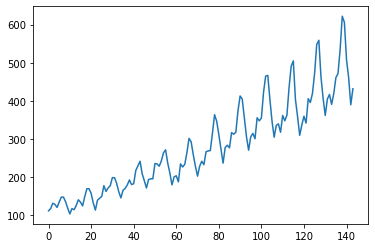

In [101]:
flights.passengers.plot()

In [93]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [105]:
np.random.seed(100)
flights.loc[ np.random.randint(0,144,30) ,"passengers"]  = np.nan
flights

,year,month,passengers
0,1949,Jan,112.0
1,1949,Feb,118.0
2,1949,Mar,132.0
3,1949,Apr,129.0
4,1949,May,NaN
...,...,...,...
139,1960,Aug,606.0
140,1960,Sep,508.0
141,1960,Oct,NaN
142,1960,Nov,390.0


<AxesSubplot:>

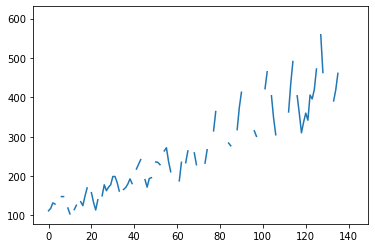

In [97]:
flights.passengers.plot()

In [106]:
flights.isnull().sum()

year           0
month          0
passengers    28
dtype: int64

In [107]:
flights.passengers.fillna(method="bfill")

0      112.0
1      118.0
2      132.0
3      129.0
4      135.0
       ...  
139    606.0
140    508.0
141    390.0
142    390.0
143      NaN
Name: passengers, Length: 144, dtype: float64

In [108]:
flights.passengers.fillna(method="ffill")

0      112.0
1      118.0
2      132.0
3      129.0
4      129.0
       ...  
139    606.0
140    508.0
141    508.0
142    390.0
143    390.0
Name: passengers, Length: 144, dtype: float64

<AxesSubplot:>

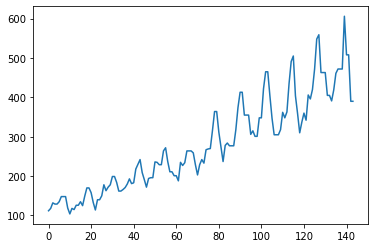

In [109]:
flights.passengers.fillna(method="ffill").plot()

<AxesSubplot:>

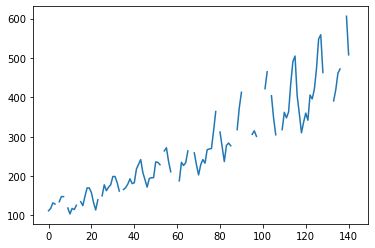

In [110]:
flights.passengers.plot()

In [111]:
flights.passengers.interpolate()

0      112.0
1      118.0
2      132.0
3      129.0
4      132.0
       ...  
139    606.0
140    508.0
141    449.0
142    390.0
143    390.0
Name: passengers, Length: 144, dtype: float64

In [112]:
np.linspace(129,135,3)

array([129., 132., 135.])

In [113]:
np.linspace(112,132,5)

array([112., 117., 122., 127., 132.])

<AxesSubplot:>

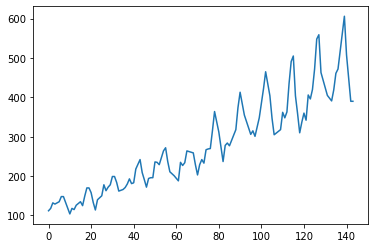

In [114]:
flights.passengers.interpolate().plot()

In [115]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [117]:
df.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [118]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:>

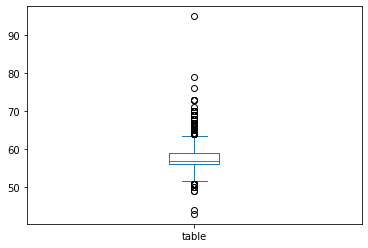

In [121]:
df.table.plot(kind = "box")

<AxesSubplot:xlabel='table'>

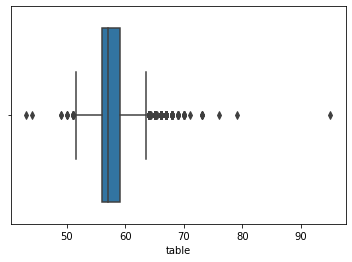

In [122]:
sns.boxplot(x = df.table)

In [123]:
df_table = df.table
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [125]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [126]:
df_table.quantile(0.25)

56.0

In [127]:
df_table.quantile(0.75)

59.0

In [128]:
df_table.quantile(1)

95.0

## Tukey's Fences | Tukey's Rule
``Q1 & Q3`` is using the ``.quantile()``


In [129]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1
IQR

3.0

In [130]:
lower_lim = Q1 - 1.5*IQR
lower_lim

51.5

In [131]:
upper_lim = Q3 + 1.5*IQR
upper_lim

63.5

In [132]:
df_table > upper_lim

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [133]:
df_table < lower_lim

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [135]:
(df_table < lower_lim).value_counts()

False    53924
True        16
Name: table, dtype: int64

In [136]:
(df_table > upper_lim).value_counts()

False    53351
True       589
Name: table, dtype: int64

In [137]:
not_outlier = (df_table >= lower_lim) & (df_table <= upper_lim)
not_outlier
#   51.5 <=  X <= 63.0

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [139]:
df_drop_outlier =  df[not_outlier]
df_drop_outlier

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [140]:
df[ (df.table >= lower_lim) & (df.table<upper_lim) ] 

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [142]:
df[ ~((df.table >= lower_lim) & (df.table <= upper_lim) ) ] 

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [144]:
df_table.loc[ df_table > upper_lim ] = upper_lim
df_table

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [145]:
df_table.loc[ df_table < lower_lim ] = lower_lim
df_table

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

<AxesSubplot:>

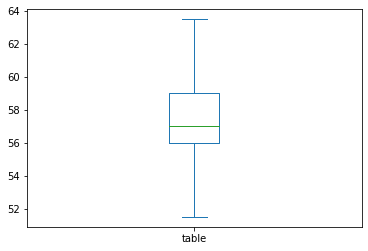

In [146]:
df_table.plot(kind ="box")

<AxesSubplot:xlabel='table'>

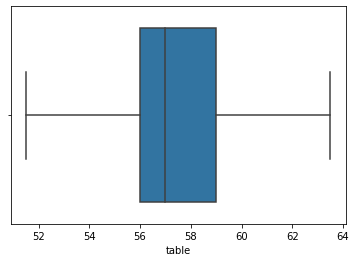

In [147]:
sns.boxplot(x = df_table)

<AxesSubplot:xlabel='table', ylabel='Count'>

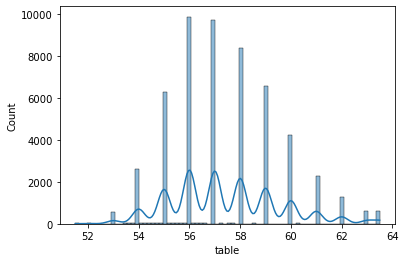

In [158]:
sns.histplot(x = df_table, kde=True)

In [148]:
df.loc[  df.table < lower_lim  , "table"] = lower_lim
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,63.5,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [149]:
df.loc[  df.table > upper_lim  , "table"] = upper_lim
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,63.5,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [159]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
# df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Limitation and Transformation of the Outliers
- ### Limitation using ``.winsorize()`` method


In [176]:
from scipy.stats.mstats import winsorize

df_win = winsorize(df.table, (0.001,0.019))
df_win.sort()
df_win

masked_array(data=[52., 52., 52., ..., 63., 63., 63.],
             mask=False,
       fill_value=1e+20)

In [183]:
len(df[df.table<lower_lim])  /  len(df)

0.00029662588060808305

In [184]:
len(df[df.table>upper_lim])  /  len(df)

0.010919540229885057

<AxesSubplot:>

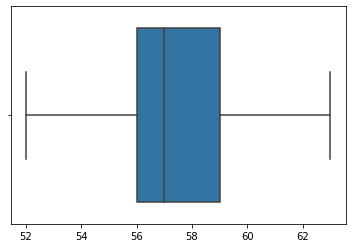

In [177]:
sns.boxplot(x = df_win)

<AxesSubplot:xlabel='table'>

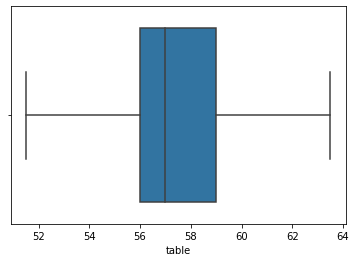

In [165]:
sns.boxplot(x = df_table)

# log

<AxesSubplot:ylabel='Frequency'>

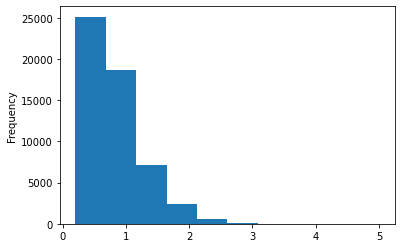

In [188]:
df.carat.plot(kind="hist")

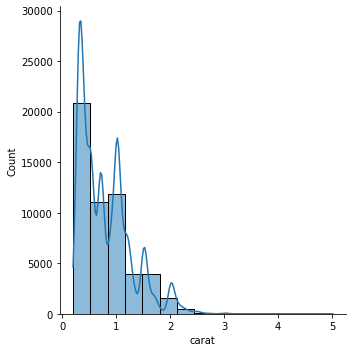

In [191]:
sns.displot(df.carat, bins = 15, kde = True)

In [192]:
df["log_carat"] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,log_carat
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


<AxesSubplot:xlabel='carat'>

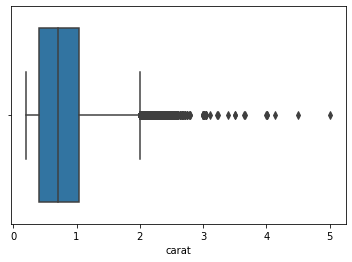

In [195]:
sns.boxplot( x = df.carat)

<AxesSubplot:xlabel='log_carat'>

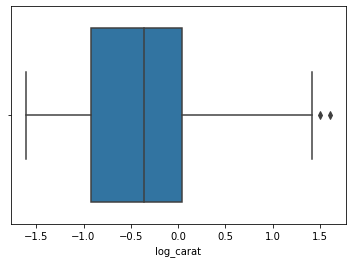

In [194]:
sns.boxplot( x = df.log_carat)

<AxesSubplot:xlabel='log_carat', ylabel='Count'>

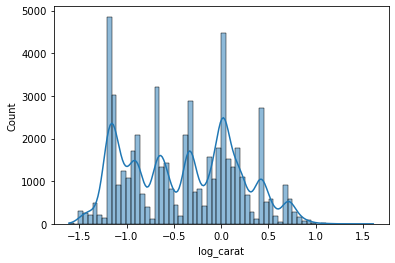

In [197]:
sns.histplot( x = df.log_carat, kde=True)

In [200]:
df_carat_log = df.log_carat
Q1_log = df_carat_log.quantile(0.25)
Q3_log = df_carat_log.quantile(0.75)
IQR_log = Q3_log-Q1_log
IQR_log

0.9555114450274363

In [201]:
lower_lim_log = Q1_log - 1.5 * IQR_log
upper_lim_log = Q3_log + 1.5 * IQR_log

In [202]:
df.loc[df.log_carat > upper_lim_log,  "log_carat"] = upper_lim_log
df

,carat,depth,table,price,x,y,z,log_carat
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


<AxesSubplot:xlabel='log_carat'>

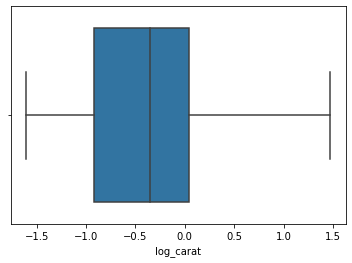

In [203]:
sns.boxplot( x = df.log_carat)